In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras

# 케라스에서 제공하는 손글씨 데이터를 불러옵니다.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 데이터 표준화
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2973 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1386 - accuracy: 0.9586
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1037 - accuracy: 0.9688
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0840 - accuracy: 0.9741
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0707 - accuracy: 0.9768


In [7]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0738 - accuracy: 0.9785 - 553ms/epoch - 2ms/step


[0.07382405549287796, 0.9785000085830688]

# CNN을 사용하여 Keras로 MNIST 손글씨 인식 판단하기

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [9]:
# 입력층
inputs = keras.Input(shape=(28, 28, 1))

# 은닉층
x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)

# 출력층으로 넘기기 전에 1차원 텐서로 변환
x = Flatten()(x)

# 출력층
outputs = Dense(10, activation="softmax")(x)

# 모델
model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
import tensorflow as tf
import numpy as np

import keras # 케라스만 import 가능합니다.
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt # 결과 이미지로 확인
import random

In [12]:
# image shape
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [13]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [14]:
batch_size = 128
num_classes = 10
epochs = 3  #여러번 학습하면 좋겠지만 시간관계상 3번만 학습하고 결과를 확인합니다.

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [15]:
# 모델 정의
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# 모델 학습
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))


# 모델 평가
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/3
469/469 [==============================] - 120s 254ms/step - loss: 0.1889 - accuracy: 0.9420 - val_loss: 0.0487 - val_accuracy: 0.9830
Epoch 2/3
469/469 [==============================] - 100s 214ms/step - loss: 0.0616 - accuracy: 0.9807 - val_loss: 0.0354 - val_accuracy: 0.9877
Epoch 3/3
469/469 [==============================] - 105s 223ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0267 - val_accuracy: 0.9913
Test loss: 0.026735344901680946
Test accuracy: 0.9912999868392944


313/313 [==============================] - 6s 19ms/step


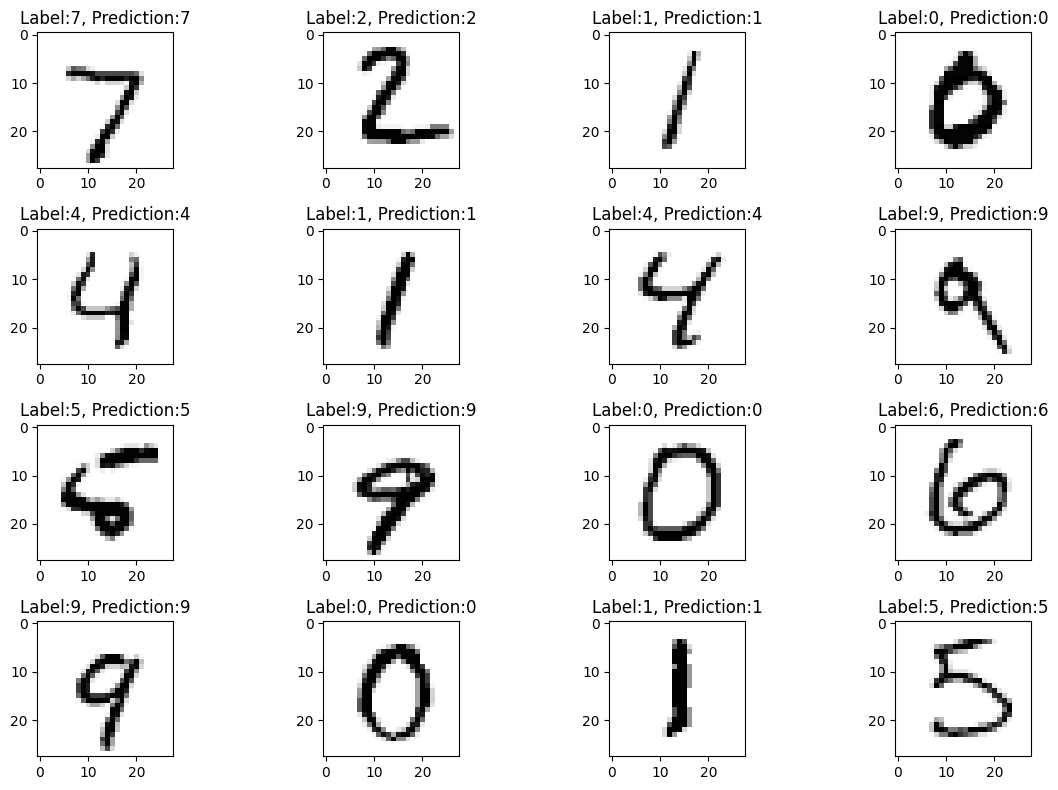

In [18]:
import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

count = 0

plt.figure(figsize=(12,8))
for n in range(16):
    count += 1
    plt.subplot(4, 4, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

## Passion Mnist CNN

In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras

# 케라스에서 제공하는 손글씨 데이터를 불러옵니다.

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


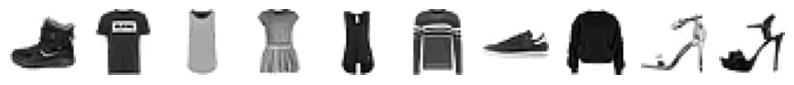

In [2]:
#시각화
import matplotlib.pyplot as plt

# 처음 10개 이미지를 표시
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [3]:
# 데이터 스케일링 및 차원 변환
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

# 훈련 데이터를 훈련 세트와 검증 세트로 분할
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [4]:
model = keras.Sequential()

# 합성곱 레이어 및 풀링 레이어 추가
# kernel_size=3와 kernel_size=(3,3)은 동일한 의미입니다.
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

# 완전 연결 레이어 추가
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 콜백 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2)

# 모델 훈련
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 73s 46ms/step - loss: 0.5142 - accuracy: 0.8159 - val_loss: 0.3406 - val_accuracy: 0.8735
Epoch 2/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.3472 - accuracy: 0.8758 - val_loss: 0.2850 - val_accuracy: 0.8916
Epoch 3/20
1500/1500 [==============================] - 75s 50ms/step - loss: 0.2942 - accuracy: 0.8929 - val_loss: 0.2584 - val_accuracy: 0.9012
Epoch 4/20
1500/1500 [==============================] - 73s 49ms/step - loss: 0.2639 - accuracy: 0.9024 - val_loss: 0.2342 - val_accuracy: 0.9114
Epoch 5/20
1500/1500 [==============================] - 70s 47ms/step - loss: 0.2393 - accuracy: 0.9135 - val_loss: 0.2306 - val_accuracy: 0.9147
Epoch 6/20
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2177 - accuracy: 0.9201 - val_loss: 0.2414 - val_accuracy: 0.9141
Epoch 7/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.2044 - accuracy: 0.9244 - val_loss: 0.2296 -

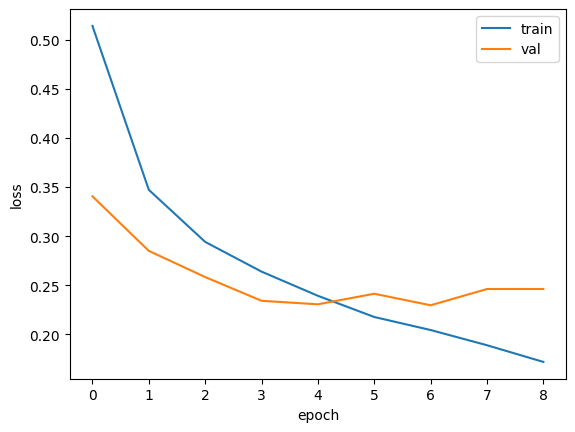

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

1/1 [==============================] - 0s 105ms/step


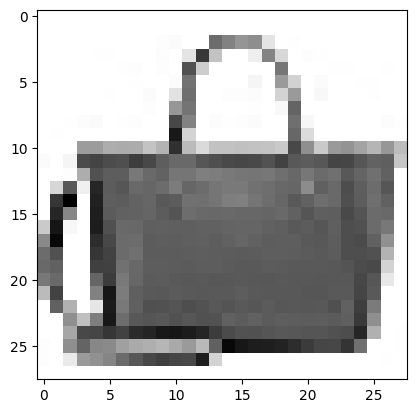

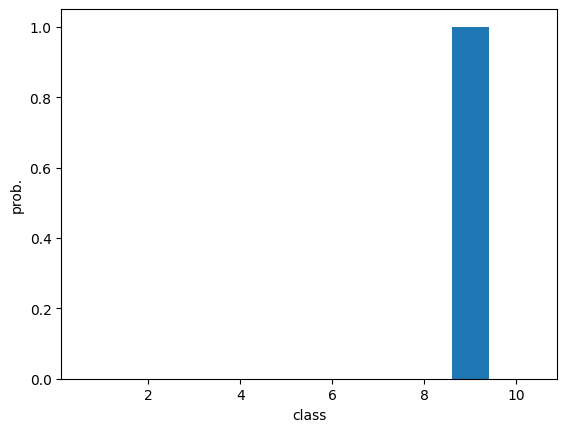

가방
313/313 [==============================] - 4s 11ms/step - loss: 0.2657 - accuracy: 0.9108


[0.26568299531936646, 0.9107999801635742]

In [7]:
import numpy as np

# 모델 평가
model.evaluate(val_scaled, val_target)

# 예측
predicted = model.predict(val_scaled[0:1])
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()
plt.bar(range(1, 11), predicted[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
print(classes[np.argmax(predicted)])

# 테스트 세트 평가
model.evaluate(test_scaled, test_target)

# Auto Keras

In [1]:
pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.5/573.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 924.6/924.6 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 48.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: ten

In [2]:
import numpy as np
import tensorflow as tf
import autokeras as ak

Using TensorFlow backend


In [3]:
# 데이터 로딩
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# 데이터 전처리: 스케일링
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
# 데이터 전처리: 차원 확장 (AutoKeras에 맞게 4D로 만듦)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [6]:
# AutoKeras 모델 생성
clf = ak.ImageClassifier(overwrite=True, max_trials=1)

In [7]:
# 모델 훈련
history = clf.fit(x_train, y_train, epochs=10)

Trial 1 Complete [00h 02m 13s]
val_loss: 0.035994499921798706

Best val_loss So Far: 0.035994499921798706
Total elapsed time: 00h 02m 13s
Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1577 - accuracy: 0.9523
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0744 - accuracy: 0.9771
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0587 - accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0496 - accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0457 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0396 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0369 - accuracy: 0.9881
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0339 - accuracy: 0.9893
Epoch 9/10
1875/1875 [=================

In [8]:
# 모델 평가
print(clf.evaluate(x_test, y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.0344 - accuracy: 0.9902
[0.0343545638024807, 0.9901999831199646]


# H2O.ai's AutoML

In [1]:
pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.3-py2.py3-none-any.whl size=240945068 sha256=edb7c3dc2361392e96ae30a04205af7a9441063a1f1a35c4ddf0723dc1cf940c
  Stored in directory: /root/.cache/pip/wheels/f9/7d/1d/e1258f0558603969a8393cb5b22a18e313337f01627a118302
Successfully built h2o


In [2]:
import h2o
from h2o.automl import H2OAutoML

# H2O 초기화
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20" 2023-07-18; OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5zvkih_t
  JVM stdout: /tmp/tmp5zvkih_t/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp5zvkih_t/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_2sr504
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [3]:
# 데이터 로드
data = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
# 데이터 분할
train, test = data.split_frame([0.8])

In [5]:
# 응답 변수 및 입력 변수 설정
response = "response"
train[response] = train[response].asfactor()
test[response] = test[response].asfactor()

In [6]:
# AutoML 설정 및 실행
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/8
# GBM base models (used / total),4/4
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [7]:
# 성능 평가
lb = aml.leaderboard
print(lb.head())

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_1_AutoML_1_20230825_54210     0.783483   0.556323  0.800374                0.311706  0.434813  0.189062
StackedEnsemble_BestOfFamily_1_AutoML_1_20230825_54210  0.780963   0.558616  0.797578                0.331182  0.435955  0.190057
StackedEnsemble_BestOfFamily_2_AutoML_1_20230825_54210  0.780399   0.559135  0.797246                0.326162  0.436226  0.190293
GBM_1_AutoML_1_20230825_54210                           0.777647   0.56235   0.796374                0.327658  0.437558  0.191457
GBM_2_AutoML_1_20230825_54210                           0.76812    0.57665   0.786157                0.332711  0.443426  0.196627
GBM_4_AutoML_1_20230825_54210                           0.762233   0.57886   0.779447                0.348089  0.444781  0.19783
GBM_3_AutoML_1_20230825_54210                           0.758243   0.587964  0.769698      

In [8]:
# 최고 성능 모델 예측
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
